In [4]:
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, log_loss
import numpy as np

In [5]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [6]:
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/Data Science Assessment/msc_testing_dataset.csv')
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/Data Science Assessment/msc_training_dataset.csv')

In [7]:
train.head()

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price
0,3,1,2,1,1,0,1,0,0,1,1,6835
1,5,2,2,2,1,0,0,0,0,1,1,9005
2,5,2,2,2,1,0,0,0,0,1,1,9005
3,1,2,1,2,0,0,0,0,1,1,0,5105
4,2,1,2,3,1,1,0,0,1,1,0,9105


In [8]:
test.head()

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price
0,1,1,1,3,0,0,1,1,0,1,0,5068
1,5,1,1,2,0,0,0,0,0,1,1,7658
2,5,1,1,3,0,0,0,1,1,1,1,11318
3,4,2,2,1,0,1,1,0,0,1,0,8858
4,5,2,1,1,0,1,1,1,0,0,1,11178


In [9]:
train.describe()

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,2.990000,1.489000,1.522000,1.998333,0.490333,0.488667,0.485000,0.495667,0.512333,0.480667,0.499667,8606.600000
std,1.424281,0.499962,0.499599,0.813153,0.499990,0.499955,0.499858,0.500065,0.499931,0.499709,0.500083,2216.248563
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2235.000000
25%,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7005.000000
50%,3.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,8615.000000
75%,4.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10215.000000
max,5.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15035.000000


In [10]:
test.describe()

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.00000,999.000000,999.000000,999.000000,999.000000
mean,3.019019,1.491491,1.496496,1.959960,0.510511,0.474474,0.523524,0.49049,0.501502,0.500501,0.495495,8601.863864
std,1.413731,0.500178,0.500238,0.809759,0.500140,0.499598,0.499696,0.50016,0.500248,0.500250,0.500230,2217.898743
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,2688.000000
25%,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,7068.000000
50%,3.000000,1.000000,1.000000,2.000000,1.000000,0.000000,1.000000,0.00000,1.000000,1.000000,0.000000,8608.000000
75%,4.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,10128.000000
max,5.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,14318.000000


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   room          3000 non-null   int64
 1   bathroom      3000 non-null   int64
 2   kitchen       3000 non-null   int64
 3   french_door   3000 non-null   int64
 4   backyard      3000 non-null   int64
 5   furnished     3000 non-null   int64
 6   green_paint   3000 non-null   int64
 7   solar_power   3000 non-null   int64
 8   woodfloor     3000 non-null   int64
 9   qlm_security  3000 non-null   int64
 10  club_access   3000 non-null   int64
 11  price         3000 non-null   int64
dtypes: int64(12)
memory usage: 281.4 KB


In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   room          999 non-null    int64
 1   bathroom      999 non-null    int64
 2   kitchen       999 non-null    int64
 3   french_door   999 non-null    int64
 4   backyard      999 non-null    int64
 5   furnished     999 non-null    int64
 6   green_paint   999 non-null    int64
 7   solar_power   999 non-null    int64
 8   woodfloor     999 non-null    int64
 9   qlm_security  999 non-null    int64
 10  club_access   999 non-null    int64
 11  price         999 non-null    int64
dtypes: int64(12)
memory usage: 93.8 KB


In [13]:
test.describe()

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.00000,999.000000,999.000000,999.000000,999.000000
mean,3.019019,1.491491,1.496496,1.959960,0.510511,0.474474,0.523524,0.49049,0.501502,0.500501,0.495495,8601.863864
std,1.413731,0.500178,0.500238,0.809759,0.500140,0.499598,0.499696,0.50016,0.500248,0.500250,0.500230,2217.898743
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,2688.000000
25%,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,7068.000000
50%,3.000000,1.000000,1.000000,2.000000,1.000000,0.000000,1.000000,0.00000,1.000000,1.000000,0.000000,8608.000000
75%,4.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,10128.000000
max,5.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,14318.000000


In [14]:
train_X = train.drop('price', axis=1)
test_X = test.drop('price', axis=1)
train_Y = train['price']
test_Y = test['price']

In [15]:
train_X.head()

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access
0,3,1,2,1,1,0,1,0,0,1,1
1,5,2,2,2,1,0,0,0,0,1,1
2,5,2,2,2,1,0,0,0,0,1,1
3,1,2,1,2,0,0,0,0,1,1,0
4,2,1,2,3,1,1,0,0,1,1,0


In [16]:
train_Y

0       6835
1       9005
2       9005
3       5105
4       9105
        ... 
2995    4825
2996    6755
2997    7565
2998    9135
2999    8955
Name: price, Length: 3000, dtype: int64

In [17]:
#Combine both test and train data
alldata = pd.concat([train, test], ignore_index=True)
alldata.describe()

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price
count,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000
mean,2.997249,1.489622,1.515629,1.988747,0.495374,0.485121,0.494624,0.494374,0.509627,0.485621,0.498625,8605.416854
std,1.421532,0.499955,0.499818,0.812375,0.500041,0.499841,0.500034,0.500031,0.499970,0.499856,0.500061,2216.384417
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2235.000000
25%,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7006.500000
50%,3.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,8615.000000
75%,4.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10191.500000
max,5.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15035.000000


In [18]:
alldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   room          3999 non-null   int64
 1   bathroom      3999 non-null   int64
 2   kitchen       3999 non-null   int64
 3   french_door   3999 non-null   int64
 4   backyard      3999 non-null   int64
 5   furnished     3999 non-null   int64
 6   green_paint   3999 non-null   int64
 7   solar_power   3999 non-null   int64
 8   woodfloor     3999 non-null   int64
 9   qlm_security  3999 non-null   int64
 10  club_access   3999 non-null   int64
 11  price         3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [19]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
#alldata = alldata.drop('price', axis=1)
alldata['price_normalized'] = scaler.fit_transform(alldata[['price']])


In [20]:
alldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   room              3999 non-null   int64  
 1   bathroom          3999 non-null   int64  
 2   kitchen           3999 non-null   int64  
 3   french_door       3999 non-null   int64  
 4   backyard          3999 non-null   int64  
 5   furnished         3999 non-null   int64  
 6   green_paint       3999 non-null   int64  
 7   solar_power       3999 non-null   int64  
 8   woodfloor         3999 non-null   int64  
 9   qlm_security      3999 non-null   int64  
 10  club_access       3999 non-null   int64  
 11  price             3999 non-null   int64  
 12  price_normalized  3999 non-null   float64
dtypes: float64(1), int64(12)
memory usage: 406.3 KB


In [21]:
#Drop price from all data

alldata = alldata.drop('price', axis=1)


In [22]:
alldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   room              3999 non-null   int64  
 1   bathroom          3999 non-null   int64  
 2   kitchen           3999 non-null   int64  
 3   french_door       3999 non-null   int64  
 4   backyard          3999 non-null   int64  
 5   furnished         3999 non-null   int64  
 6   green_paint       3999 non-null   int64  
 7   solar_power       3999 non-null   int64  
 8   woodfloor         3999 non-null   int64  
 9   qlm_security      3999 non-null   int64  
 10  club_access       3999 non-null   int64  
 11  price_normalized  3999 non-null   float64
dtypes: float64(1), int64(11)
memory usage: 375.0 KB


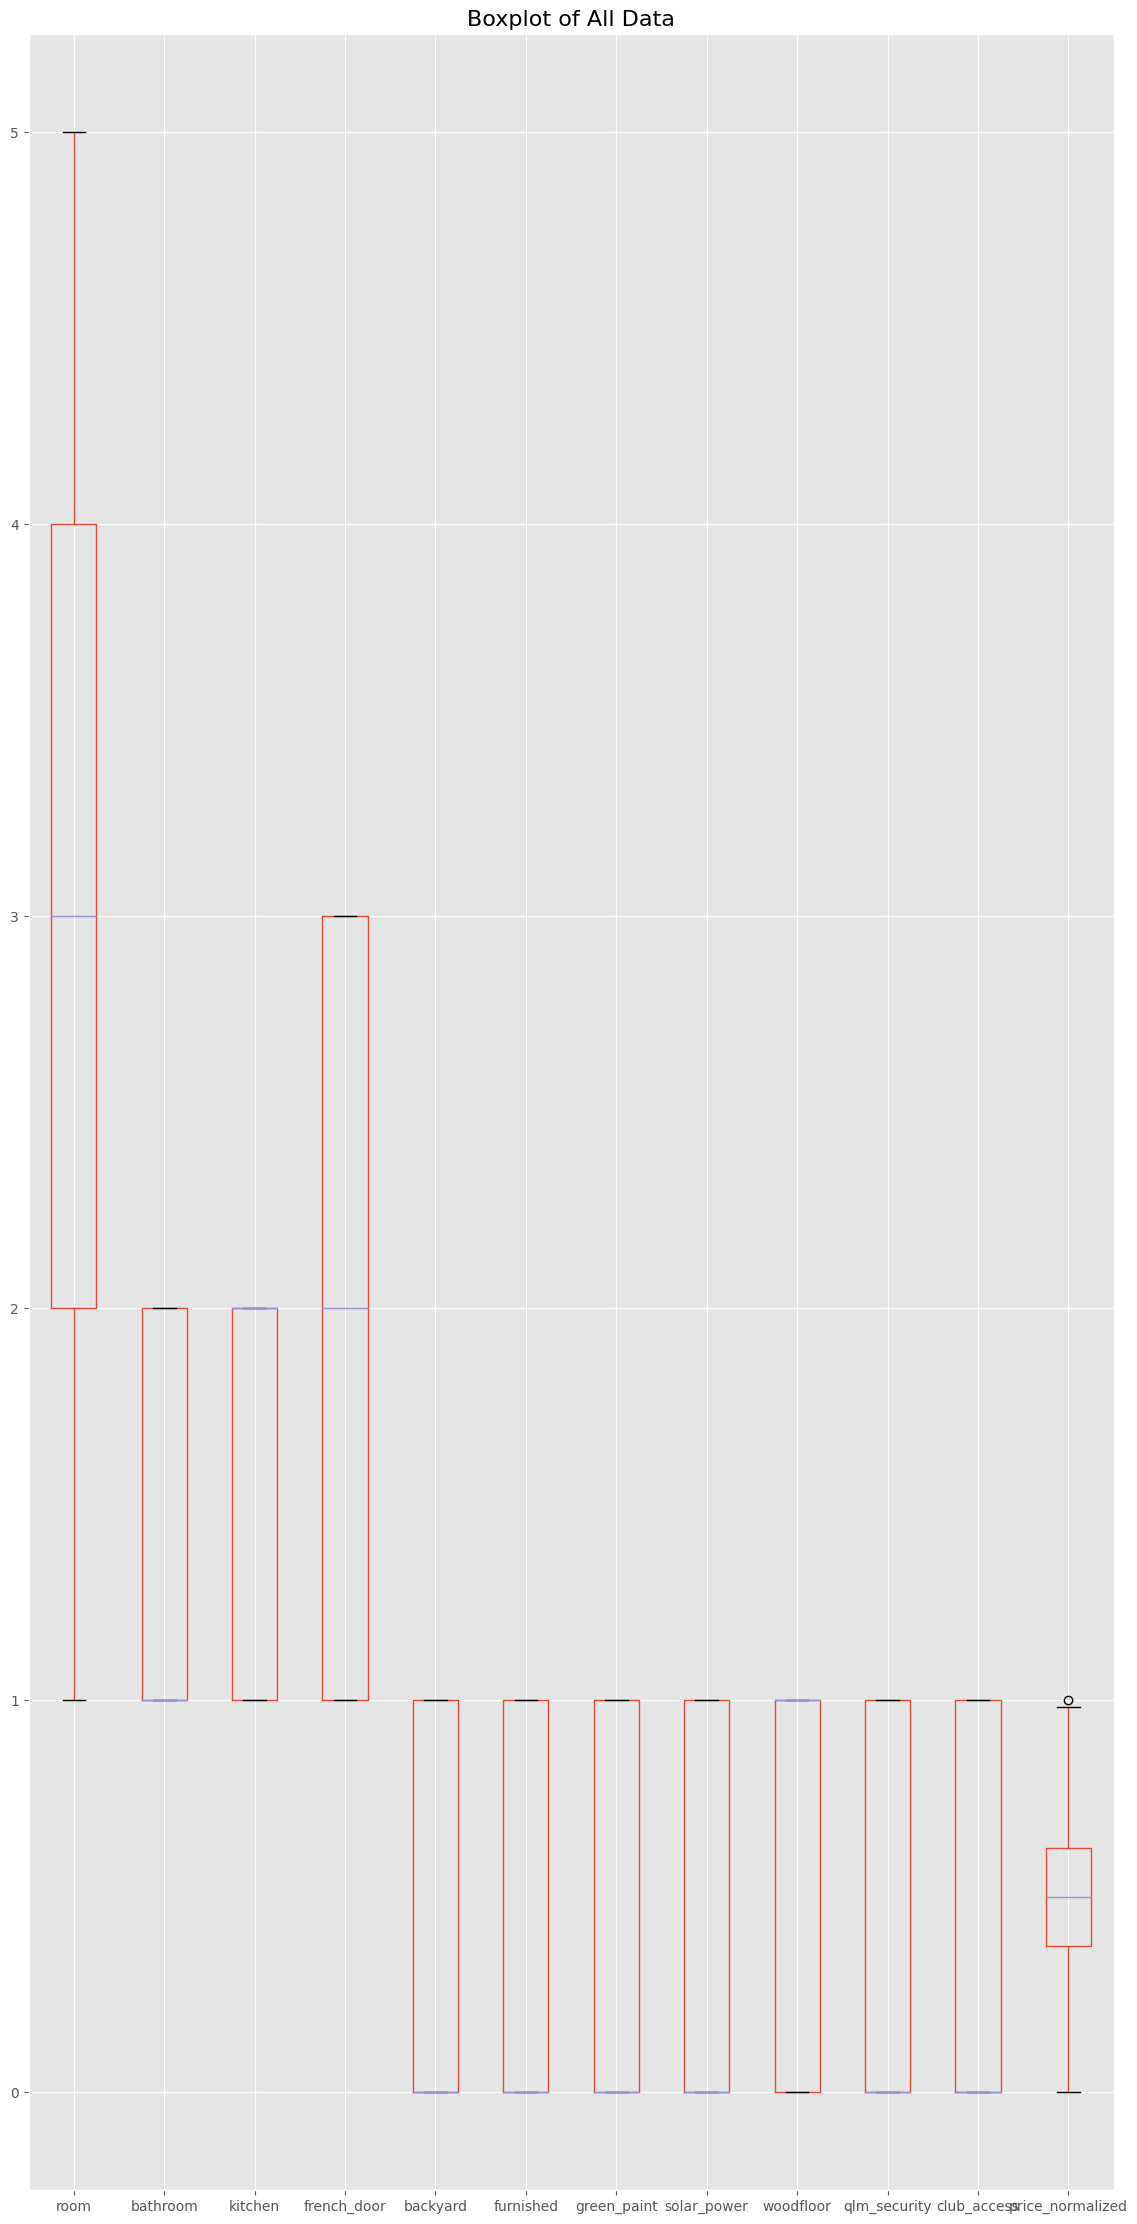

In [23]:
import matplotlib.pyplot as plt

alldata.boxplot(figsize=(14,28))
plt.title('Boxplot of All Data', fontsize=16)
plt.show()


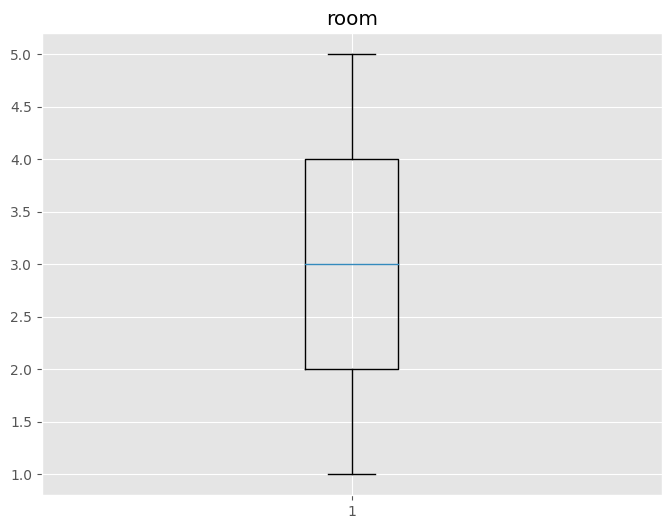

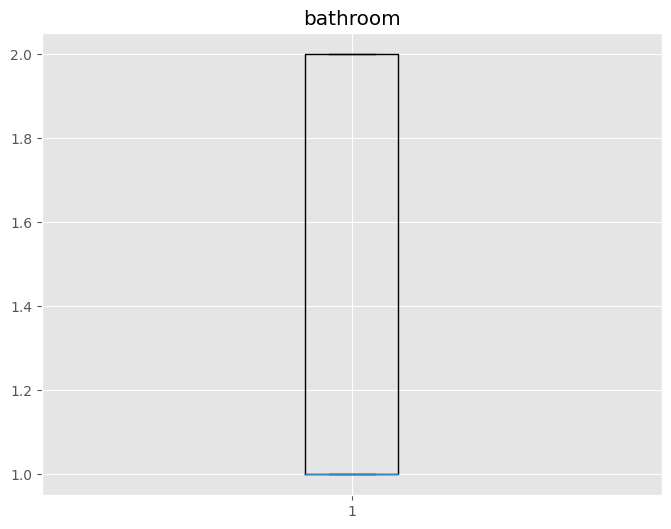

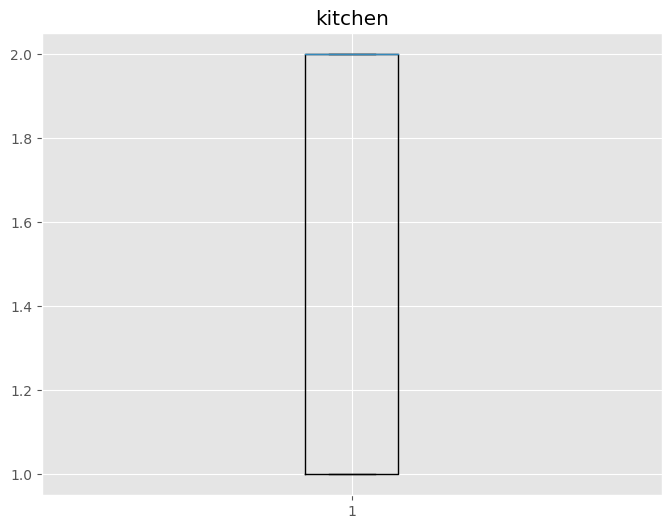

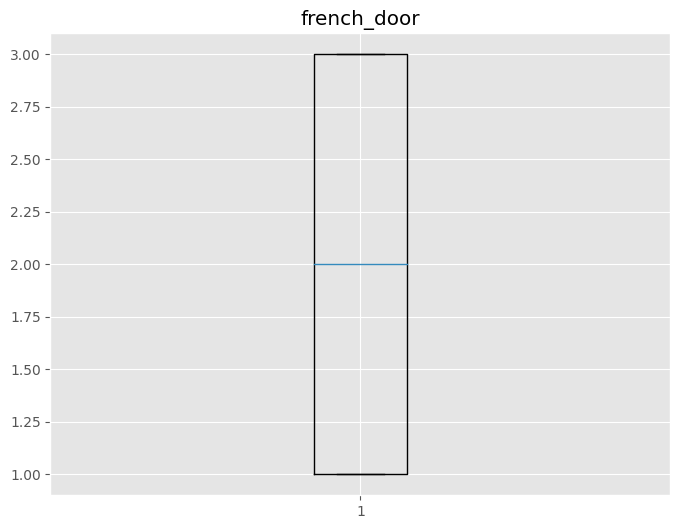

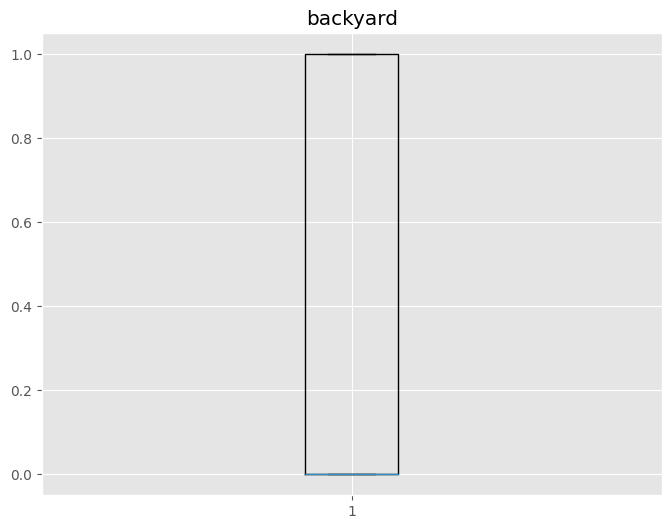

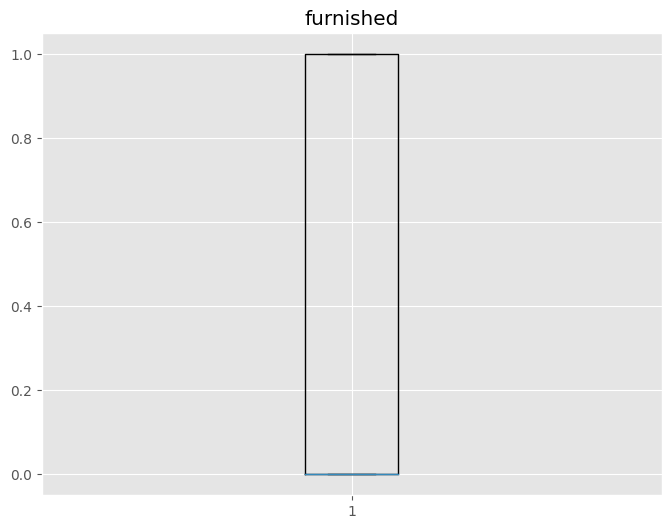

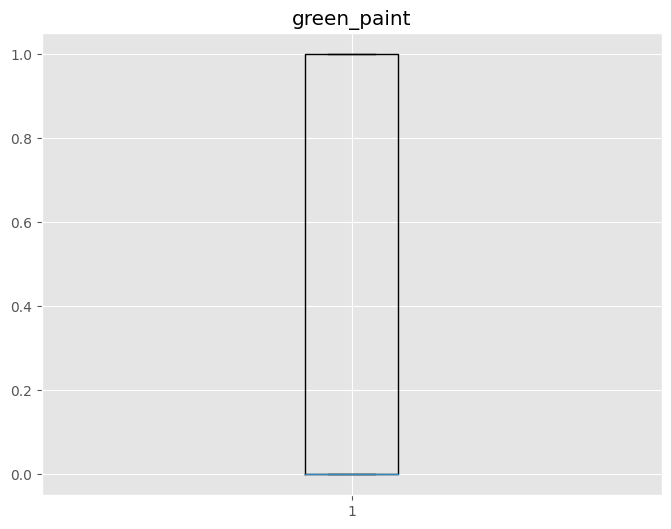

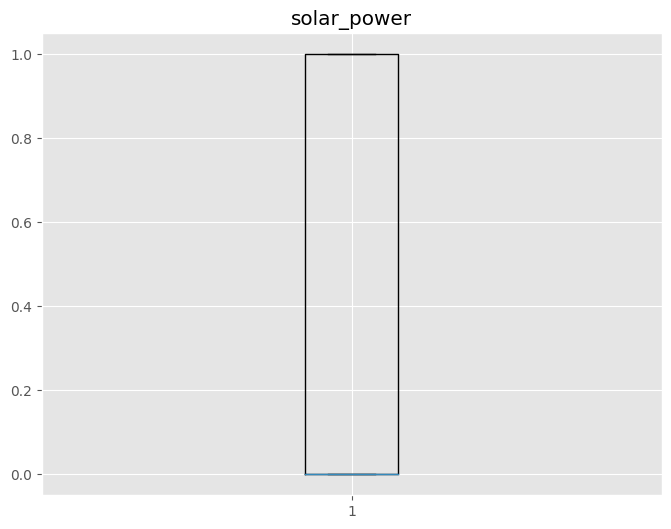

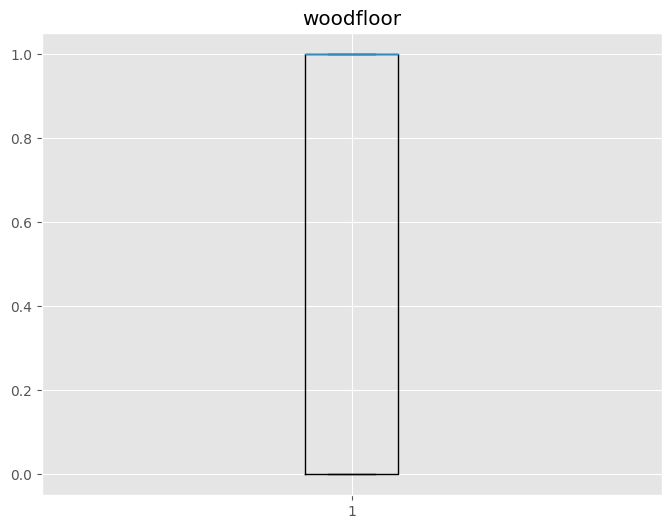

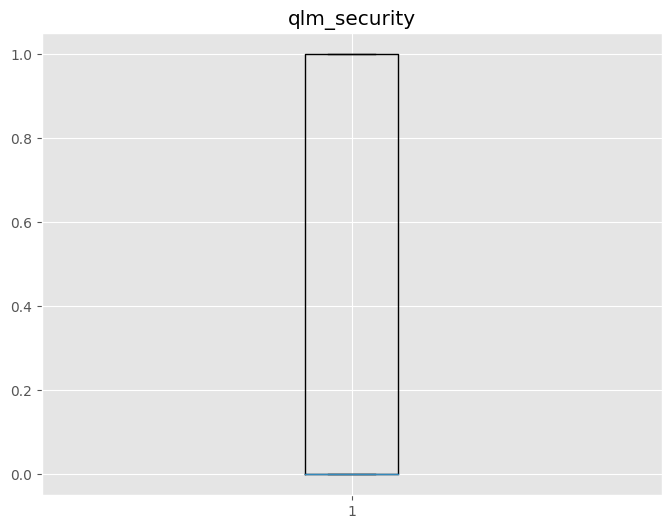

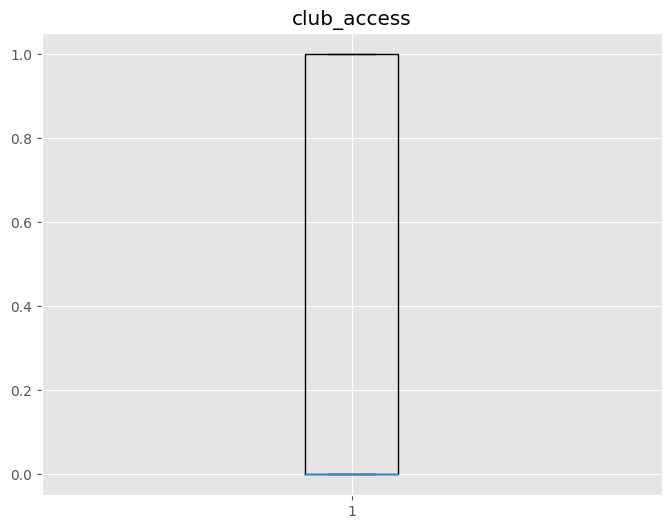

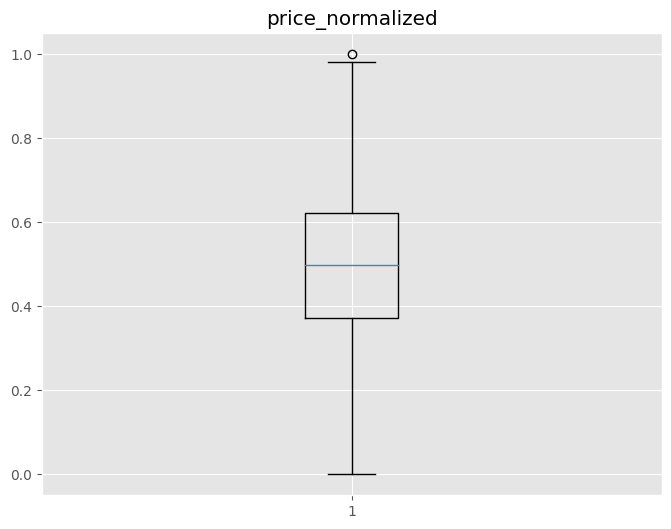

In [24]:
import matplotlib.pyplot as plt

# create box plot for each column
for col in alldata.columns:
    fig, ax = plt.subplots(figsize=(8,6))
    ax.boxplot(alldata[col])
    ax.set_title(col)
    plt.show()


In [25]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(train_X, train_Y)

In [26]:
predicted = reg.predict(test_X)

In [27]:
predicted

array([ 5055.,  7645., 11305.,  8845., 11165., 11375., 11735.,  6835.,
        7815.,  5895.,  9095.,  8295.,  6695., 11305.,  7205.,  9165.,
        8775., 12745.,  9745.,  6655.,  9325.,  7785.,  7075.,  4315.,
        9965.,  6855.,  7335.,  8895.,  6325.,  9695.,  6645., 10305.,
       10485.,  8195.,  7565., 10355.,  9475., 11115.,  9765., 12825.,
        6295.,  5125.,  9825.,  8895., 11715.,  6205.,  4095., 11475.,
        9565.,  5535., 11455., 10395.,  4125.,  7735., 13055.,  9595.,
        6445.,  8365., 10155.,  7835.,  8275., 14305.,  7075.,  8435.,
       12625.,  7095., 11435., 10555., 10095.,  5535.,  8235., 12095.,
        4215.,  5865.,  9355.,  9245.,  7065., 11625., 10855., 10825.,
        8785.,  7355., 11865.,  8315., 11805.,  5945.,  8775.,  8275.,
        7165.,  8245.,  7575., 11925., 11965.,  7975.,  6645., 10795.,
       11235.,  8195.,  9355.,  7445.,  7235.,  8935.,  4575.,  9675.,
        5735.,  5075., 10645.,  9705.,  8605., 12515.,  8165.,  6105.,
      

In [28]:
print(reg.score(train_X, train_Y))

1.0


In [29]:
print(mean_absolute_error(test_Y, predicted))

13.000000000000469


In [30]:
from sklearn.metrics import mean_squared_error

# assume you have already trained and tested your linear regression model
predicted = reg.predict(test_X)

# calculate root mean squared error (RMSE)
rmse = mean_squared_error(test_Y, predicted, squared=False)

# print the RMSE
print("Root Mean Squared Error (RMSE): {:.19f}".format(rmse))


Root Mean Squared Error (RMSE): 13.0000000000004671818


In [31]:
# predict on test set
predicted = reg.predict(test_X)

# calculate evaluation metrics
mse = mean_squared_error(test_Y, predicted)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_Y, predicted)
r2 = r2_score(test_Y, predicted)


# print evaluation metrics
print("Mean Squared Error (MSE): ", mse)
print("Root Mean Squared Error (RMSE): ", rmse)
print("Mean Absolute Error (MAE): ", mae)
print("R-squared (R2) Score: ", r2)



Mean Squared Error (MSE):  169.00000000001216
Root Mean Squared Error (RMSE):  13.000000000000467
Mean Absolute Error (MAE):  13.000000000000469
R-squared (R2) Score:  0.9999656095212318


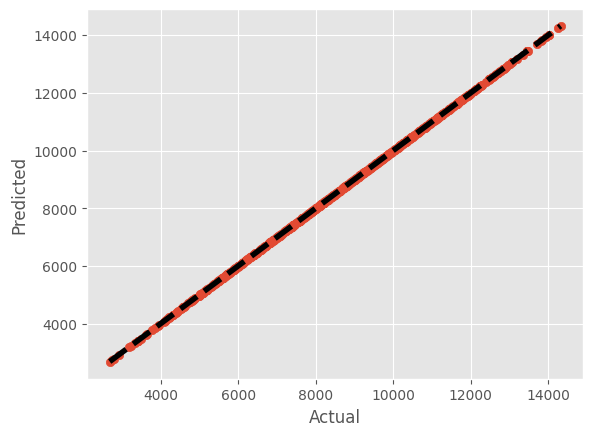

In [32]:
#make_plot(test_Y, predicted)
import matplotlib.pyplot as plt
import numpy as np

def make_plot(y_true, y_pred):
    fig, ax = plt.subplots()
    ax.scatter(y_true, y_pred)
    ax.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'k--', lw=4)
    ax.set_xlabel('Actual')
    ax.set_ylabel('Predicted')
    plt.show()

# Example usage:
make_plot(test_Y, predicted)


In [33]:
importance = reg.coef_
features = train_X.columns
ranks_and_features = zip(importance, features)
ranks_and_features = sorted(ranks_and_features, reverse=True)
for i, (score, name) in enumerate(ranks_and_features):
    print("{:d}. {:s} ({:.2f}%)".format(i+1, name, 100*abs(score)/sum(abs(importance))))


1. furnished (20.92%)
2. woodfloor (19.77%)
3. solar_power (16.00%)
4. room (10.46%)
5. club_access (7.64%)
6. backyard (5.86%)
7. kitchen (5.23%)
8. qlm_security (4.60%)
9. green_paint (3.87%)
10. bathroom (3.14%)
11. french_door (2.51%)


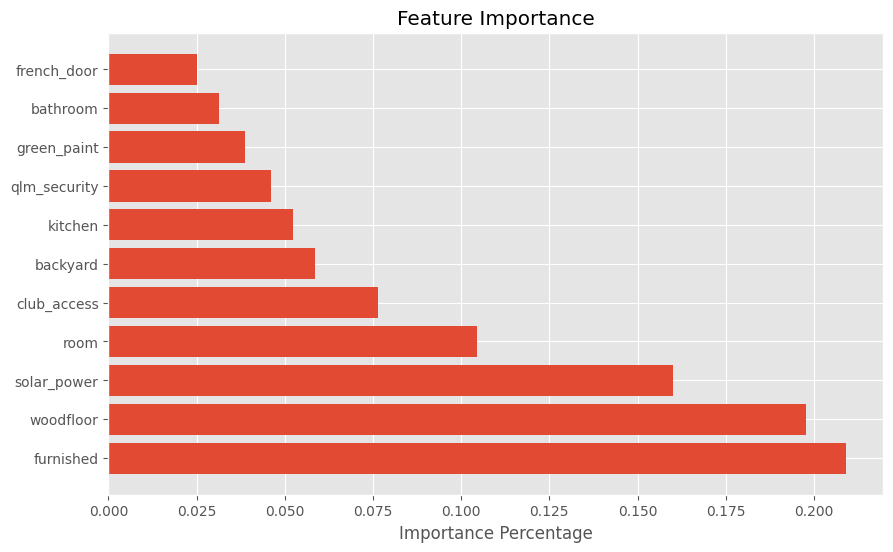

In [34]:
importance = reg.coef_
features = train_X.columns
ranks_and_features = zip(importance, features)
ranks_and_features = sorted(ranks_and_features, reverse=True)
names = [x[1] for x in ranks_and_features]
percentages = [abs(x[0])/sum(abs(importance)) for x in ranks_and_features]

fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(names, percentages)
ax.set_xlabel('Importance Percentage')
ax.set_title('Feature Importance')
plt.show()
